In [1]:
import sys
import os
from warnings import simplefilter

# Add the Functions folder to your path
sys.path.append(os.path.abspath("/Users/alexandra/Desktop/EG-CLR/Functions"))

# Now import your functions
from QC_functions import *
from CLR_functions import *
from Verfication_functions import *
from Plot_functions import *

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
mdata = mu.read("/Volumes/G-DRIVE mobile USB-C/Single-cell_data/K562/10x/ISSAACC-seq_generated/hg19_10xCloud_aligned_data/processed_data/multiome_data_5.25.25.h5mu")

adata_gem = mdata['rna']
adata_atac = mdata['atac']

adata_gem = assign_chr('/Volumes/G-DRIVE mobile USB-C/Single-cell_data/K562/10x/ISSAACC-seq_generated/hg19_10xCloud_aligned_data/filtered_feature_bc_matrix/features.tsv.gz', adata_gem)


/opt/anaconda3/envs/k562_analysis/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/anaconda3/envs/k562_analysis/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [3]:
MI_Matrix_chrx = load_matrix("/Users/alexandra/Desktop/EG-CLR/Test/results/ChrX_51Genes_S1_Binarized_10K_K562_5.28.25.pkl")
MI_Matrix_chrx_2 = load_matrix("/Users/alexandra/Desktop/EG-CLR/Test/results/ChrX_51Genes_S2_Binarized_10K_K562_5.28.25.pkl")

MI_Matrix_adjusted = distance_adjustment(MI_Matrix_chrx, adata_gem.var['Start'])
MI_Matrix_adjusted_2 = distance_adjustment(MI_Matrix_chrx_2, adata_gem.var['Start'])

# computer CLR matrix ChrX
CLR_matrix_chrx = CLR_Matrix(MI_Matrix_adjusted)
CLR_matrix_chrx_2 = CLR_Matrix(MI_Matrix_adjusted_2)

/Users/alexandra/Desktop/EG-CLR/Functions/CLR_functions.py:432: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  MI_Matrix_adjusted[gene_name][peak_name] = MI_adjusted


In [4]:
CLR_matrix_chrx_z = z_score_filter(CLR_matrix_chrx, zthre=1)
CLR_matrix_chrx_2_z = z_score_filter(CLR_matrix_chrx_2, zthre=1)


# intersection of CLR matrixes
CLR_matrix_intersection = intersection_CLR(CLR_matrix_chrx_z, CLR_matrix_chrx_2_z)

In [5]:
CLR_matrix_intersection_df = convert_matrix_to_df(CLR_matrix_intersection)
CLR_matrix_intersection_df

,Element,Value,Gene
0,chrX:101054060-101054956,1.053312,ALAS2
1,chrX:1791873-1792786,1.457226,ALAS2
2,chrX:3429921-3430831,1.022250,ALAS2
3,chrX:37644519-37645298,2.102050,ALAS2
4,chrX:38501333-38501989,1.004600,ALAS2
...,...,...,...
15597,chrX:150539115-150539989,1.002194,ZNF280C
15598,chrX:154365421-154366205,1.190697,ZNF280C
15599,chrX:86838475-86839320,1.426509,ZNF280C
15600,chrX:97828388-97829264,1.233106,ZNF280C


In [6]:
CLR_matrix_intersection_df_tss = calculate_tss(CLR_matrix_intersection_df, adata_gem)
CLR_matrix_intersection_df_tss

,Element,Value,Gene,Start,End,Chr_peak,Start_peak,End_peak,distance_to_tss
0,chrX:101054060-101054956,1.053312,ALAS2,55057409,55057497,chrX,101054060,101054956,96524085
1,chrX:1791873-1792786,1.457226,ALAS2,55057409,55057497,chrX,1791873,1792786,52369187
2,chrX:3429921-3430831,1.022250,ALAS2,55057409,55057497,chrX,3429921,3430831,49912117
3,chrX:37644519-37645298,2.102050,ALAS2,55057409,55057497,chrX,37644519,37645298,1409715
4,chrX:38501333-38501989,1.004600,ALAS2,55057409,55057497,chrX,38501333,38501989,2694874
...,...,...,...,...,...,...,...,...,...
15597,chrX:150539115-150539989,1.002194,ZNF280C,129402872,129402873,chrX,150539115,150539989,96406237
15598,chrX:154365421-154366205,1.190697,ZNF280C,129402872,129402873,chrX,154365421,154366205,102145651
15599,chrX:86838475-86839320,1.426509,ZNF280C,129402872,129402873,chrX,86838475,86839320,855263
15600,chrX:97828388-97829264,1.233106,ZNF280C,129402872,129402873,chrX,97828388,97829264,17340148


In [7]:
print("there are ", len(set(CLR_matrix_intersection_df_tss['Gene'])), " genes with valid CRISPRi elements in the data set")

there are  51  genes with valid CRISPRi elements in the data set


In [8]:
print("there are ", len(set(CLR_matrix_intersection_df_tss['Element'])), " peaks in the data set")

there are  3424  peaks in the data set


In [9]:
print("there are ", len((CLR_matrix_intersection_df_tss['Gene'])), " predictions in the data set")

there are  15602  predictions in the data set


In [11]:
CLR_matrix_intersection_df_tss

,Element,Value,Gene,Start,End,Chr_peak,Start_peak,End_peak,distance_to_tss
0,chrX:101054060-101054956,1.053312,ALAS2,55057409,55057497,chrX,101054060,101054956,96524085
1,chrX:1791873-1792786,1.457226,ALAS2,55057409,55057497,chrX,1791873,1792786,52369187
2,chrX:3429921-3430831,1.022250,ALAS2,55057409,55057497,chrX,3429921,3430831,49912117
3,chrX:37644519-37645298,2.102050,ALAS2,55057409,55057497,chrX,37644519,37645298,1409715
4,chrX:38501333-38501989,1.004600,ALAS2,55057409,55057497,chrX,38501333,38501989,2694874
...,...,...,...,...,...,...,...,...,...
15597,chrX:150539115-150539989,1.002194,ZNF280C,129402872,129402873,chrX,150539115,150539989,96406237
15598,chrX:154365421-154366205,1.190697,ZNF280C,129402872,129402873,chrX,154365421,154366205,102145651
15599,chrX:86838475-86839320,1.426509,ZNF280C,129402872,129402873,chrX,86838475,86839320,855263
15600,chrX:97828388-97829264,1.233106,ZNF280C,129402872,129402873,chrX,97828388,97829264,17340148


In [14]:
print("Max CLR value is ", CLR_matrix_intersection_df_tss["Value"].max(), " Min CLR value is ", CLR_matrix_intersection_df_tss["Value"].min(), " Ave CLR value is ",CLR_matrix_intersection_df_tss["Value"].mean())

Max CLR value is  83.34266587930969  Min CLR value is  1.0000063159028045  Ave CLR value is  4.057971607004636


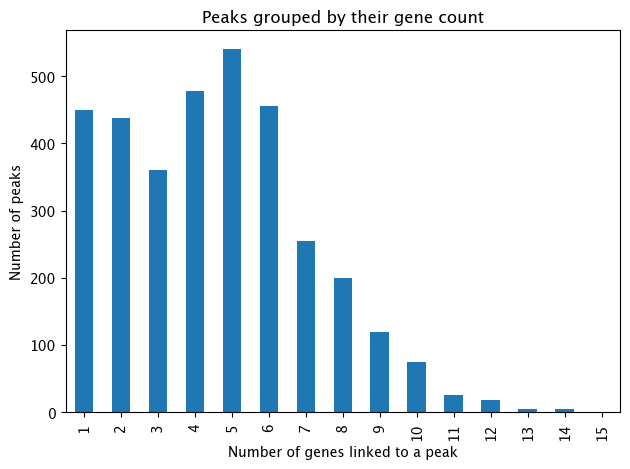

Average peak for each gene 4.556658878504673


In [15]:
plot_peaks_per_gene(CLR_matrix_intersection_df_tss , peak_col='Element', gene_col='Gene',)

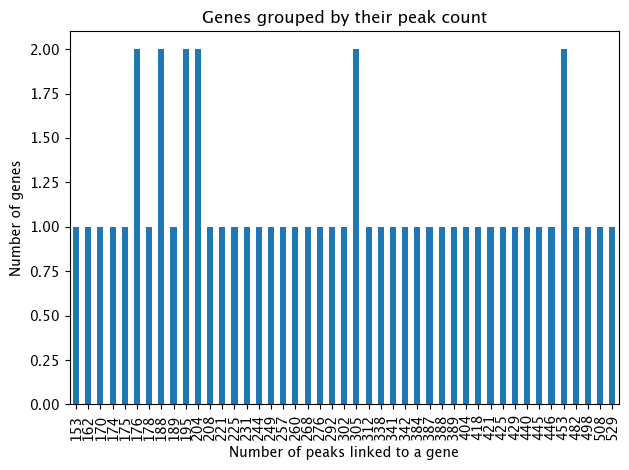

Average gene for each peak 305.921568627451


In [16]:
plot_genes_per_peak(CLR_matrix_intersection_df_tss , peak_col='Element', gene_col='Gene')

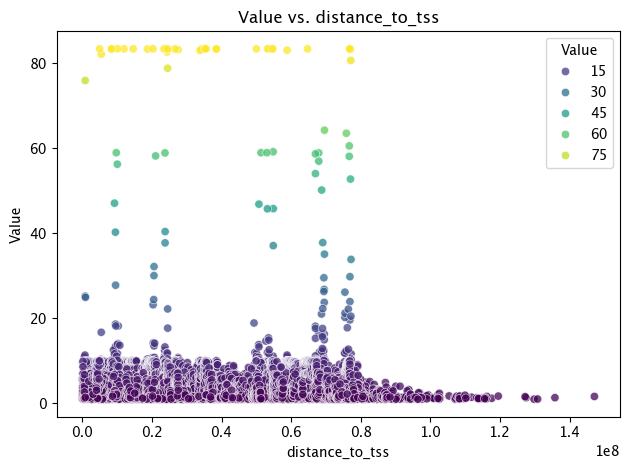

In [17]:
plot_values(CLR_matrix_intersection_df_tss, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

In [18]:
MI_Matrix_chrx_df = convert_matrix_to_df(MI_Matrix_chrx)
MI_Matrix_chrx_df

,Element,Value,Gene
0,chrX:63937-64751,0.000171,P2RY8
1,chrX:167850-168779,0.000510,P2RY8
2,chrX:177954-178742,0.001136,P2RY8
3,chrX:195324-196191,0.005268,P2RY8
4,chrX:199615-200526,0.000413,P2RY8
...,...,...,...
127337,chrX:155230855-155231670,0.002613,MTCP1
127338,chrX:155232071-155232857,0.004842,MTCP1
127339,chrX:155245756-155246664,0.005229,MTCP1
127340,chrX:155249188-155250096,0.001149,MTCP1


In [19]:
MI_Matrix_chrx_df_tss = calculate_tss(MI_Matrix_chrx_df, adata_gem)
MI_Matrix_chrx_df_tss

,Element,Value,Gene,Start,End,Chr_peak,Start_peak,End_peak,distance_to_tss
0,chrX:63937-64751,0.000171,P2RY8,1655999,1656000,chrX,63937,64751,1559687
1,chrX:167850-168779,0.000510,P2RY8,1655999,1656000,chrX,167850,168779,1403760
2,chrX:177954-178742,0.001136,P2RY8,1655999,1656000,chrX,177954,178742,1388674
3,chrX:195324-196191,0.005268,P2RY8,1655999,1656000,chrX,195324,196191,1362580
4,chrX:199615-200526,0.000413,P2RY8,1655999,1656000,chrX,199615,200526,1356121
...,...,...,...,...,...,...,...,...,...
127337,chrX:155230855-155231670,0.002613,MTCP1,154299500,154376050,chrX,155230855,155231670,78508915
127338,chrX:155232071-155232857,0.004842,MTCP1,154299500,154376050,chrX,155232071,155232857,78510724
127339,chrX:155245756-155246664,0.005229,MTCP1,154299500,154376050,chrX,155245756,155246664,78531313
127340,chrX:155249188-155250096,0.001149,MTCP1,154299500,154376050,chrX,155249188,155250096,78536461


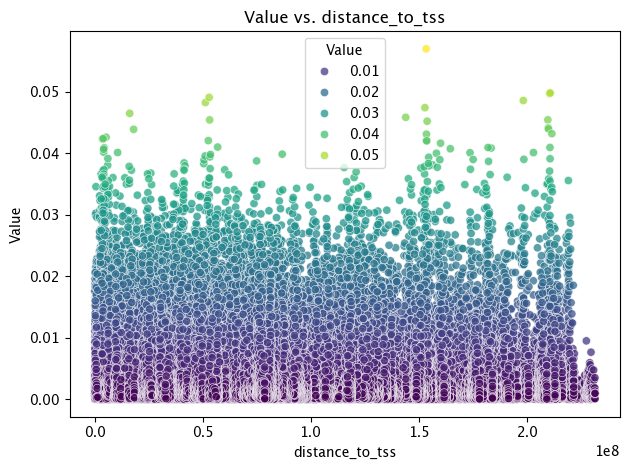

In [20]:
plot_values(MI_Matrix_chrx_df_tss, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

In [21]:
MI_Matrix_chrx_df_2 = convert_matrix_to_df(MI_Matrix_chrx_2)
MI_Matrix_chrx_df_2

,Element,Value,Gene
0,chrX:62333-63291,0.001788,ALAS2
1,chrX:63937-64751,0.000013,ALAS2
2,chrX:69671-70530,0.000968,ALAS2
3,chrX:165841-166651,0.000076,ALAS2
4,chrX:167850-168779,0.000765,ALAS2
...,...,...,...
144045,chrX:155232071-155232857,0.003347,ZNF280C
144046,chrX:155245756-155246664,0.004432,ZNF280C
144047,chrX:155249188-155250096,0.000424,ZNF280C
144048,chrX:155254614-155255426,0.000649,ZNF280C


In [22]:
MI_Matrix_chrx_df_tss_2 = calculate_tss(MI_Matrix_chrx_df_2, adata_gem)
MI_Matrix_chrx_df_tss_2

,Element,Value,Gene,Start,End,Chr_peak,Start_peak,End_peak,distance_to_tss
0,chrX:62333-63291,0.001788,ALAS2,55057409,55057497,chrX,62333,63291,54963475
1,chrX:63937-64751,0.000013,ALAS2,55057409,55057497,chrX,63937,64751,54961141
2,chrX:69671-70530,0.000968,ALAS2,55057409,55057497,chrX,69671,70530,54952517
3,chrX:165841-166651,0.000076,ALAS2,55057409,55057497,chrX,165841,166651,54808287
4,chrX:167850-168779,0.000765,ALAS2,55057409,55057497,chrX,167850,168779,54805214
...,...,...,...,...,...,...,...,...,...
144045,chrX:155232071-155232857,0.003347,ZNF280C,129402872,129402873,chrX,155232071,155232857,103445627
144046,chrX:155245756-155246664,0.004432,ZNF280C,129402872,129402873,chrX,155245756,155246664,103466216
144047,chrX:155249188-155250096,0.000424,ZNF280C,129402872,129402873,chrX,155249188,155250096,103471364
144048,chrX:155254614-155255426,0.000649,ZNF280C,129402872,129402873,chrX,155254614,155255426,103479455


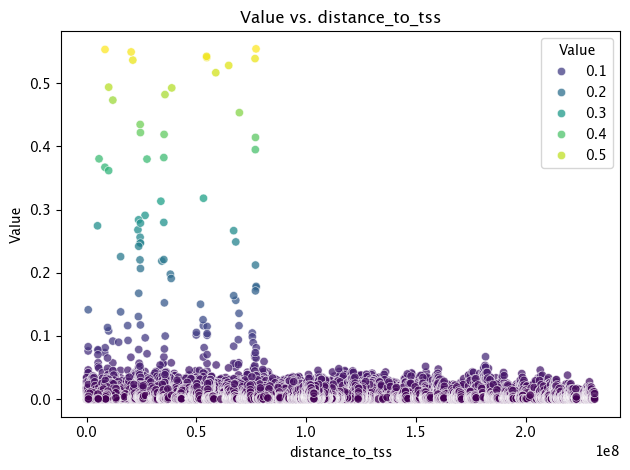

In [23]:
plot_values(MI_Matrix_chrx_df_tss_2, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

## Gene = GATA1

In [24]:
GATA1_CLR = CLR_matrix_intersection_df_tss[CLR_matrix_intersection_df_tss["Gene"] == "GATA1"]
GATA1_MI = MI_Matrix_chrx_df_tss[MI_Matrix_chrx_df_tss["Gene"] == "GATA1"]
GATA1_MI_2 = MI_Matrix_chrx_df_tss_2[MI_Matrix_chrx_df_tss_2["Gene"] == "GATA1"]

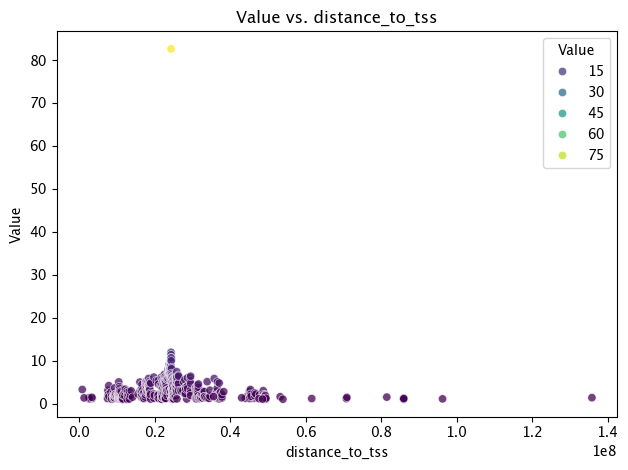

In [25]:
plot_values(GATA1_CLR, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

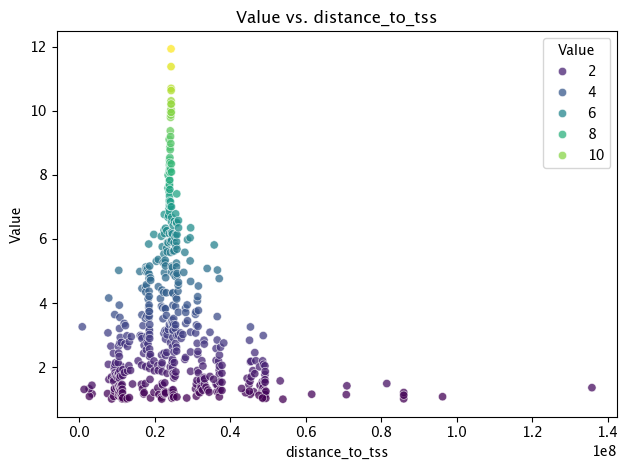

In [26]:
plot_values(GATA1_CLR[GATA1_CLR["Value"] < 40], x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

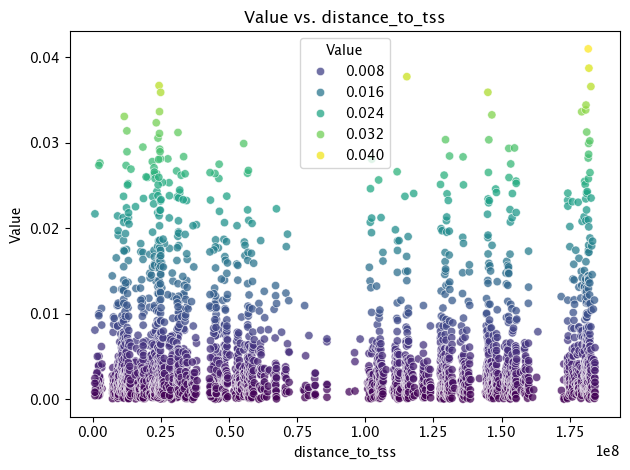

In [27]:
plot_values(GATA1_MI, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

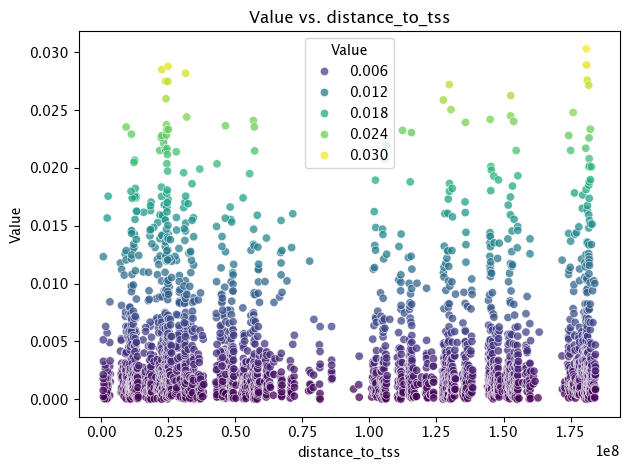

In [28]:
plot_values(GATA1_MI_2[GATA1_MI_2["Value"] < 0.1], x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

## Gene = TAZ

In [29]:
TAZ_CLR = CLR_matrix_intersection_df_tss[CLR_matrix_intersection_df_tss["Gene"] == "TAZ"]
TAZ_MI = MI_Matrix_chrx_df_tss[MI_Matrix_chrx_df_tss["Gene"] == "TAZ"]
TAZ_MI_2 = MI_Matrix_chrx_df_tss_2[MI_Matrix_chrx_df_tss_2["Gene"] == "TAZ"]


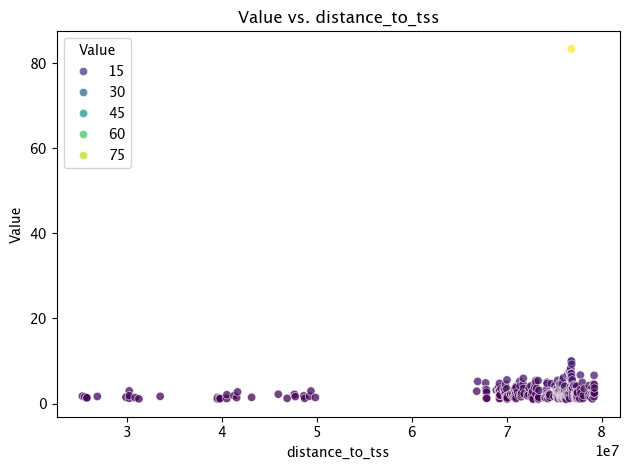

In [30]:
plot_values(TAZ_CLR, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

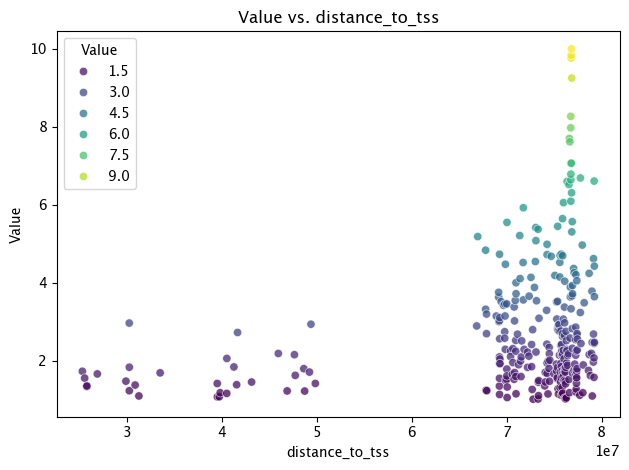

In [31]:
plot_values(TAZ_CLR[TAZ_CLR["Value"] < 40], x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

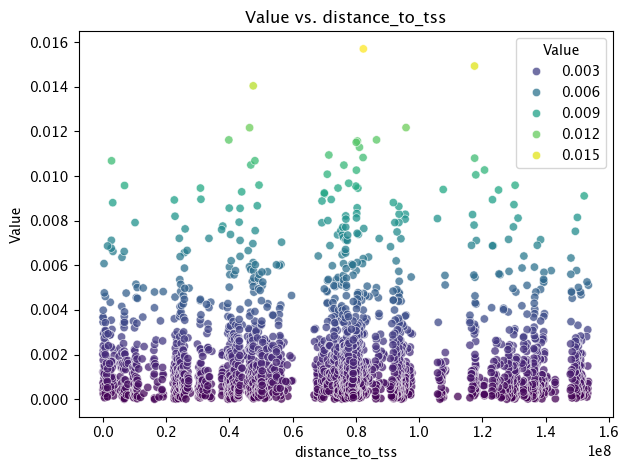

In [41]:
plot_values(TAZ_MI, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

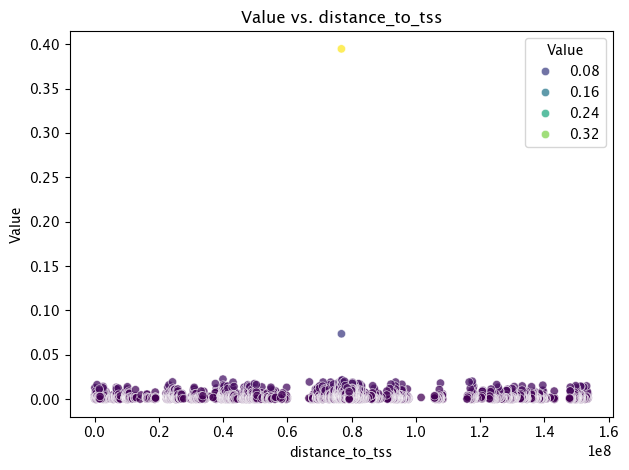

In [42]:
plot_values(TAZ_MI_2, x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)

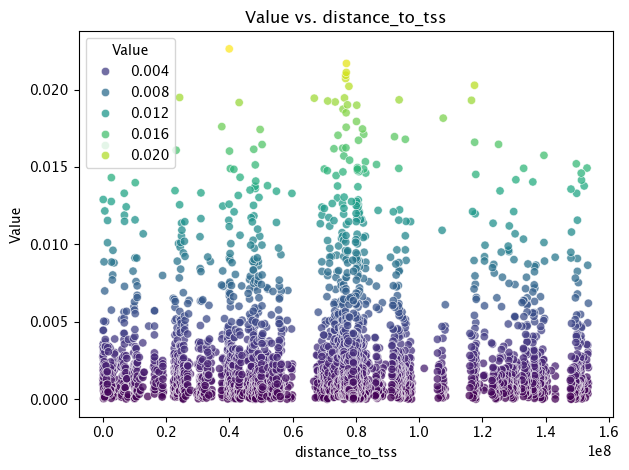

In [44]:
plot_values(TAZ_MI_2[TAZ_MI_2["Value"] < 0.05], x_col="distance_to_tss", y_col="Value", hue_col="Value", palette_discrete = False, line_fit=False)